K-Means
cie.cen

In [2]:
library(ggplot2)
library(dplyr)
load("C:/Data/Thu_Mast_CS/R/THU/Cluster.RData")

In [4]:
objects()

[1] "cie.cen"     "cie.pxy"     "cie.Txt"     "cie.Txt2"    "data"       
 [6] "E.dist"      "F.4014"      "g"           "h.E.cluster" "h.M.cluster"
[11] "km"          "M.dist"      "MoCen"       "MoEqF"       "Mono"       
[16] "pxy"         "S79"         "WODCS"

head(cie.pxy)

In [6]:
data.cie<-cie.cen
data.cie<-data.cie[-1]
str(data.cie)

Classes 'tbl_df', 'tbl' and 'data.frame':	22 obs. of  2 variables:
 $ cx: num  0.28 0.284 0.287 0.29 0.293 ...
 $ cy: num  0.244 0.25 0.256 0.262 0.268 ...


In [58]:
E.dist <- dist(data.cie, method="euclidean") # 歐式距離

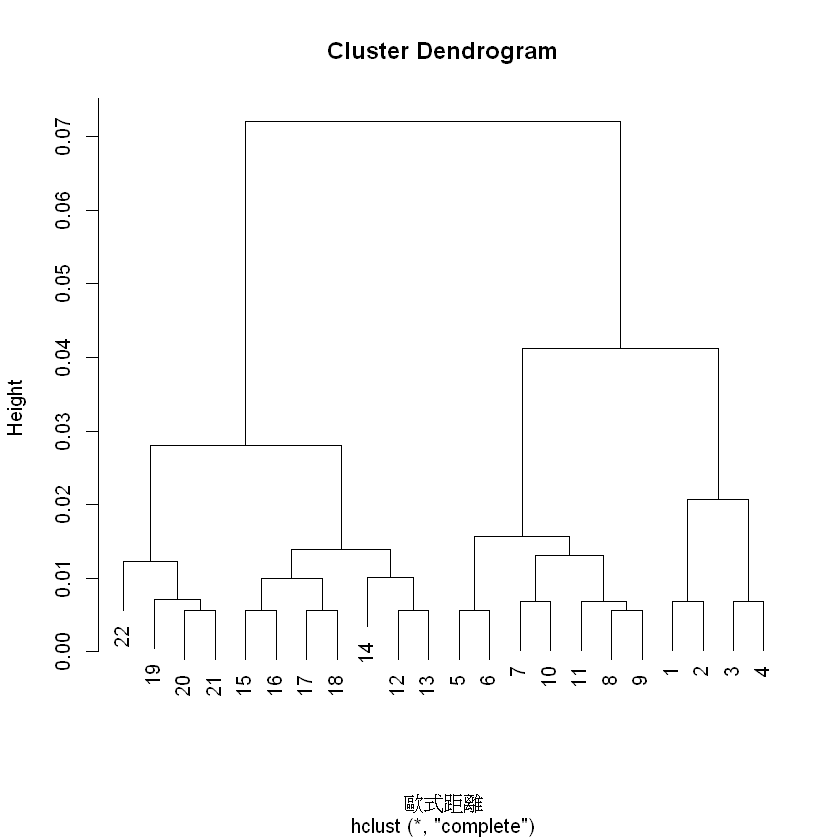

In [59]:
# 使用歐式距離進行分群
h.E.cluster <- hclust(E.dist)
plot(h.E.cluster, xlab="歐式距離")

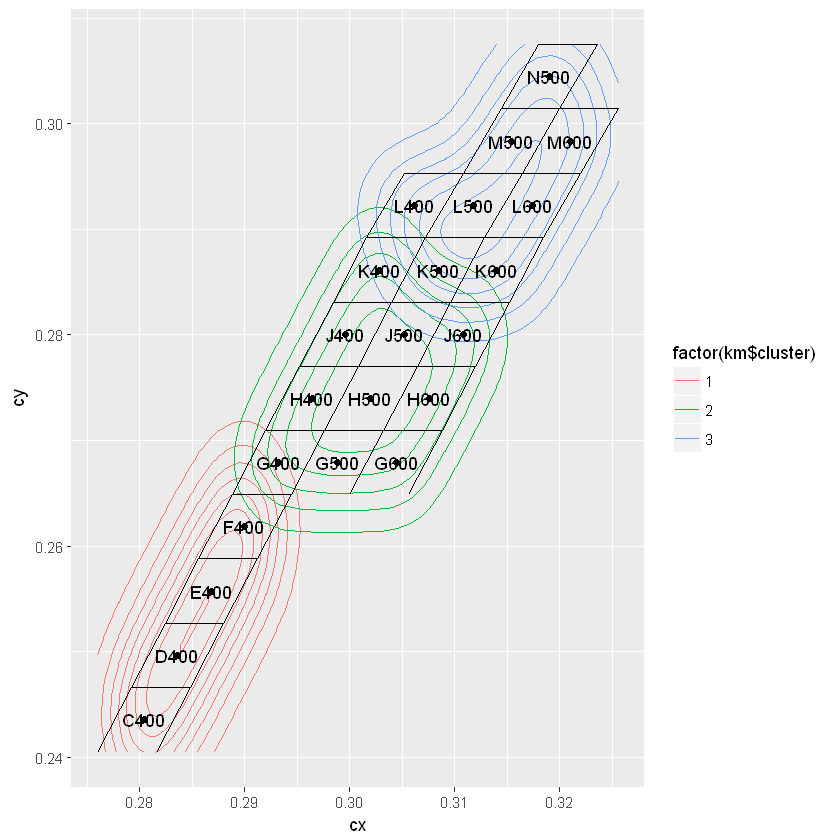

In [64]:
km <- kmeans(data.cie, centers = 3, nstart = 5)

ggplot(data = data.cie,aes(x=cx,y=cy))+
stat_density2d(aes(color = factor(km$cluster)))+
geom_point(data=cie.cen,aes(x=cx,y=cy))+
geom_path(data=cie.pxy,aes(x=cx,y=cy,group=POS_ID))+
geom_text(data=cie.cen,aes(x=cx,y=cy,label=POS_ID))

In [10]:
head(cie.Txt)

POS_ID,cx,cy,LBcon,PKG_QTY
D400,0.2836,0.24765,4,1195866.7
E400,0.2868,0.25375,5,1304400.0
F400,0.2900,0.25985,5,1304400.0
G400,0.2932,0.26595,6,1689840.0
G500,0.2988,0.26595,3,909600.0
G600,0.3044,0.26595,2,487666.7


cx,cy,LBcon,PKG_QTY
0.2836,0.24765,4,1195866.7
0.2868,0.25375,5,1304400.0
0.2900,0.25985,5,1304400.0
0.2932,0.26595,6,1689840.0
0.2988,0.26595,3,909600.0
0.3044,0.26595,2,487666.7


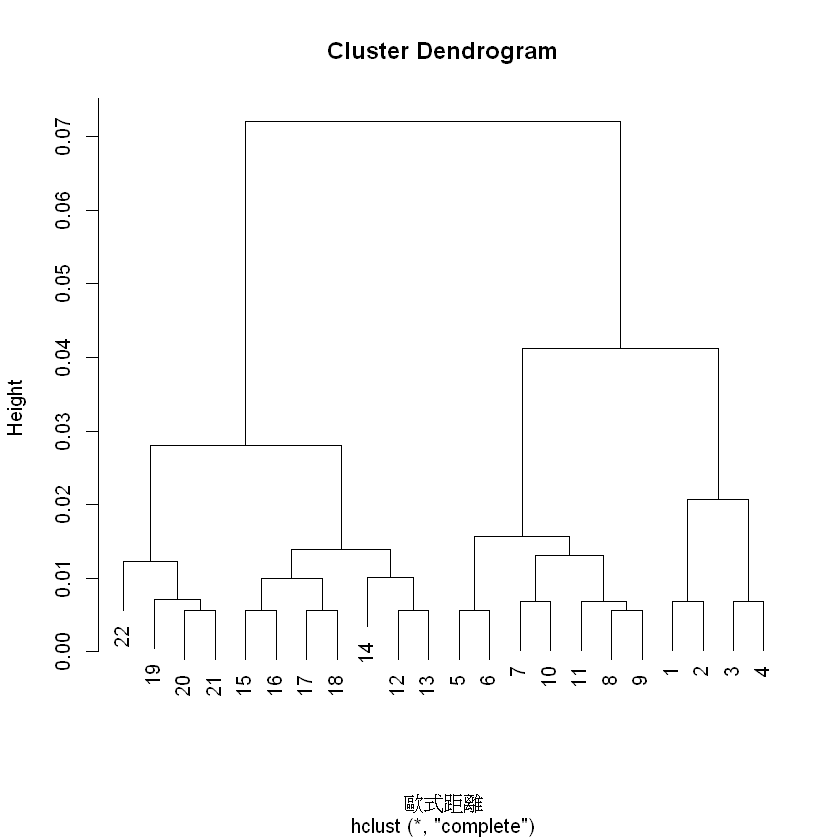

In [74]:
data.ciedemand<-cie.Txt
data.ciedemand<-data.ciedemand[-1]
#data.ciedemand$LBcon<-NULL
E.dist <- dist(data.cie, method="euclidean") # 歐式距離
head(data.ciedemand)

plot(h.E.cluster, xlab="歐式距離")

In [75]:
head(data.ciedemand)
km <- kmeans(data.ciedemand, centers = 4, nstart = 1)

cx,cy,LBcon,PKG_QTY
0.2836,0.24765,4,1195866.7
0.2868,0.25375,5,1304400.0
0.2900,0.25985,5,1304400.0
0.2932,0.26595,6,1689840.0
0.2988,0.26595,3,909600.0
0.3044,0.26595,2,487666.7


In [57]:
str(km)
head(km$centers)

List of 9
 $ cluster     : int [1:21] 4 4 4 6 5 1 6 3 1 6 ...
 $ centers     : num [1:7, 1:3] 0.313 0.313 0.309 0.287 0.299 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "1" "2" "3" "4" ...
  .. ..$ : chr [1:3] "cx" "cy" "PKG_QTY"
 $ totss       : num 2.96e+13
 $ withinss    : num [1:7] 8.38e-04 1.55e+08 8.43e+09 7.85e+09 0.00 ...
 $ tot.withinss: num 2.14e+10
 $ betweenss   : num 2.95e+13
 $ size        : int [1:7] 6 2 5 3 1 3 1
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


,cx,cy,PKG_QTY
1,0.3125333,0.281125,487666.7
2,0.3126000,0.296350,462899.9
3,0.3085600,0.284160,3485497.0
4,0.2868000,0.253750,1268222.2
5,0.2988000,0.265950,909600.0
6,0.2964000,0.272000,1747344.8


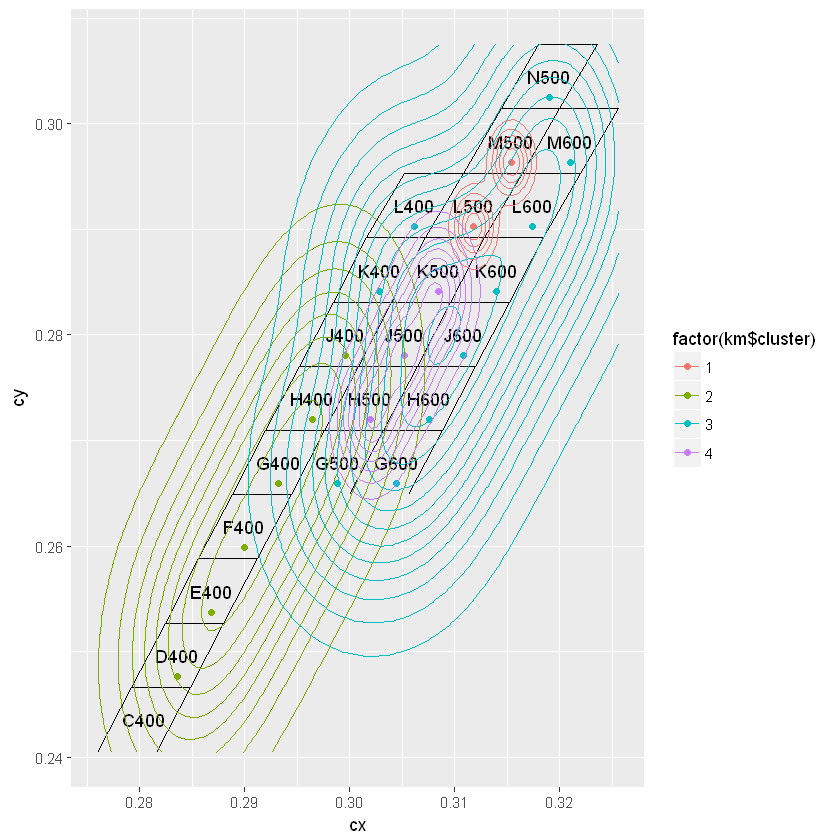

In [76]:
ggplot(data.ciedemand, aes(x = cx, y = cy)) +
  geom_point(aes(color = factor(km$cluster))) +
  geom_path(data=cie.pxy,aes(x=cx,y=cy,group=POS_ID))+
  geom_text(data=cie.cen,aes(x=cx,y=cy,label=POS_ID))+
  stat_density2d(aes(color = factor(km$cluster)))